
Classifying iris species flowers using KNN estimator

Here we find the best way to find the value of 'k' for classifying an out-of-sample data into one of the three iris species

In [5]:
#1.importing the class KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# importing the function load_iris which will return the iris dataset
from sklearn.datasets import load_iris
# for splitting the dataset into test and train
from sklearn.model_selection import train_test_split
# importing the metrics for measuring accuracy between predicted and true responses
from sklearn import metrics

In [6]:
#iris holds the object of datatype 'bunch' which has the dataset and other attributes
iris = load_iris()

In [7]:
#shows the dataset, only the features 
print (iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [8]:
#name of the features present in iris dataset
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
#the response for each observation in the dataset in numerical form
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
#shows the name of the values present in the finite set for classification 
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [11]:
# separating the features and response into separate objects
# 'X' is a feature matrix 
X = iris.data
# 'y' is a response vector
y = iris.target

In [12]:
# All of the above objects are of type numpy.ndarray
type (X)

numpy.ndarray

In [13]:
#about to perform train/test split and find testing accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 4)
print (X_train.shape)
print (X_test.shape)

(90, 4)
(60, 4)


In [14]:
# 2. Instantiating the 'estimator'
knn = KNeighborsClassifier(n_neighbors = 5)

# 3. fit the model with data, aka 'model training'
knn.fit(X_train, y_train)

# 4. Predict the response for observations being passed, here 'X-test'
y_pred = knn.predict(X_test)

# getting the testing accuracy of KNN (K=5)
print (metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


Using different values for 'K' in KNN

for the case k = 5 we got , accuracy = 96.67%, trying k values from 1 to 25, we get ...

In [15]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy')

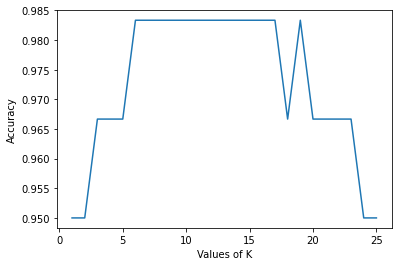

In [16]:
import matplotlib.pyplot as plt

# for plotting the graph inside the notebook itself
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Values of K')
plt.ylabel('Accuracy')

This shows that train/test split punishes models which have are too complex or not complex enough, so the best value for 'k' is around 11

In [17]:
# 2. Instantiating the 'estimator'
knn = KNeighborsClassifier(n_neighbors = 11)
# 3. fit the model with data, aka 'model training'
knn.fit(X, y)
# 4. Predict the out-of-sample data
knn.predict([3, 5, 4, 2])

ValueError: ignored